# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [3]:
import numpy as np

import matplotlib.pyplot as plt  # your favorite data package
import pandas as pd  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
# from google.colab import files
# uploaded = files.upload()
# import datasets as od
# database_url=''

In [5]:
 train_df = pd.read_csv("train.csv")
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
train_df.drop("dropoff_datetime", axis=1, inplace=True)
train_df["pickup_datetime"] = pd.to_datetime(train_df["pickup_datetime"])
train_df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

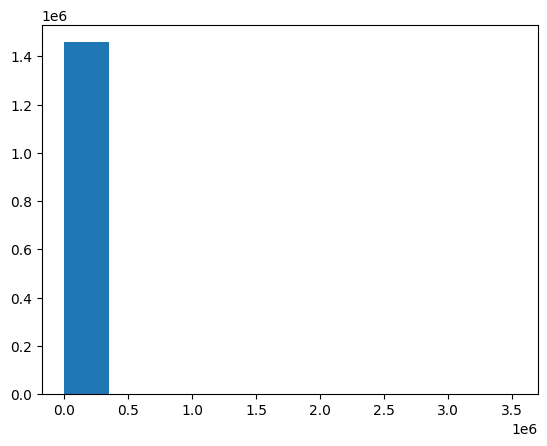

<NumpyExtensionArray>
[ 455,  663, 2124,  429,  435,  443,  341, 1551,  255, 1225,
 ...
  972,  237,  800,  760,  414,  778,  655,  764,  373,  198]
Length: 1458644, dtype: int64
1 3526282


In [7]:
# plt.hist(train_df["trip_duration"].array)
plt.hist(train_df["trip_duration"])
plt.show()
print(train_df["trip_duration"].array)
print(train_df["trip_duration"].min(), train_df["trip_duration"].max())


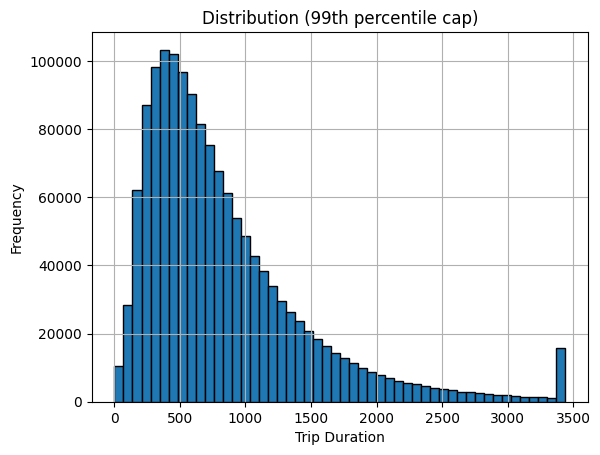

In [8]:
train_df["trip_duration"].clip(upper=train_df["trip_duration"].quantile(0.99)).hist(bins=50, edgecolor="black")
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")
plt.title("Distribution (99th percentile cap)")
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

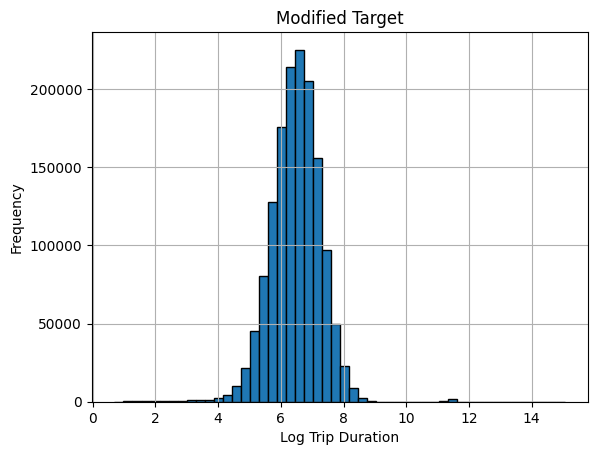

In [9]:
train_df["log_trip_duration"]=np.log1p(train_df["trip_duration"])

train_df["log_trip_duration"].hist(bins=50, edgecolor="black")
plt.xlabel("Log Trip Duration")
plt.ylabel("Frequency")
plt.title("Modified Target")
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
best = train_df["log_trip_duration"].mean()
print(best)

6.466978409297406


In [11]:
def rmsle(log1p_y_true: np.ndarray, log1p_y_pred: np.ndarray | float) -> np.ndarray:
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

rmsle_best_const = rmsle(train_df["log_trip_duration"], train_df["log_trip_duration"].mean())
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [12]:
train_df["pickup_datetime"].describe()

count                          1458644
mean     2016-04-01 10:10:24.940037120
min                2016-01-01 00:00:17
25%      2016-02-17 16:46:04.249999872
50%                2016-04-01 17:19:40
75%      2016-05-15 03:56:08.750000128
max                2016-06-30 23:59:39
Name: pickup_datetime, dtype: object

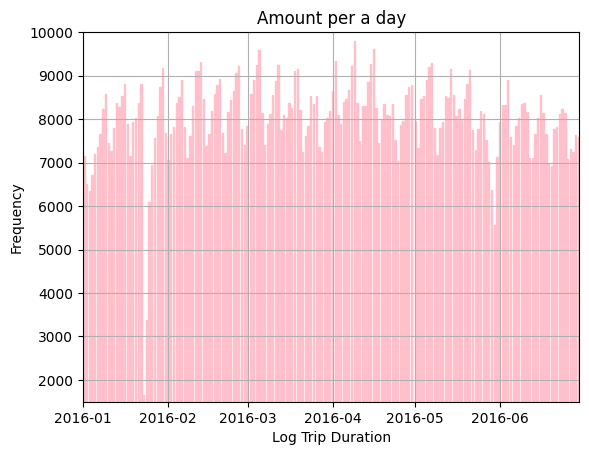

In [13]:
import datetime
train_df["pickup_datetime"].dt.date.hist(bins=365, color="pink", edgecolor="pink")
plt.ylim(1500, 10000)
plt.xlim(datetime.date(2016, 1, 1), datetime.date(2016, 6, 30))
plt.xlabel("Log Trip Duration")
plt.ylabel("Frequency")
plt.title("Amount per a day")
plt.show()

In [14]:
import seaborn as sns

<Axes: xlabel='pickup_datetime', ylabel='Count'>

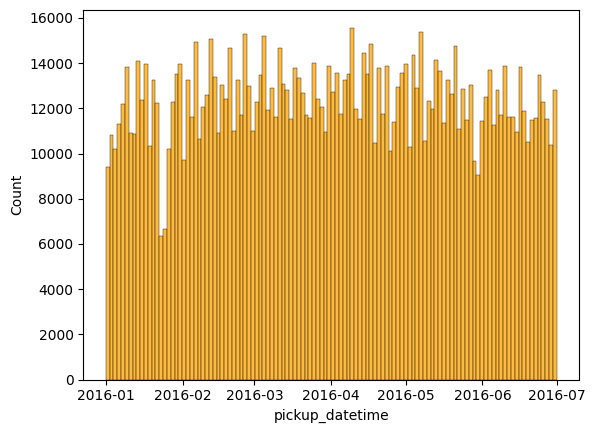

In [15]:
sns.histplot(train_df["pickup_datetime"], color='orange')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [16]:
train_df[train_df["pickup_datetime"].dt.month==11]["pickup_datetime"].dt.dayofweek.value_counts().sort_index()

Series([], Name: count, dtype: int64)

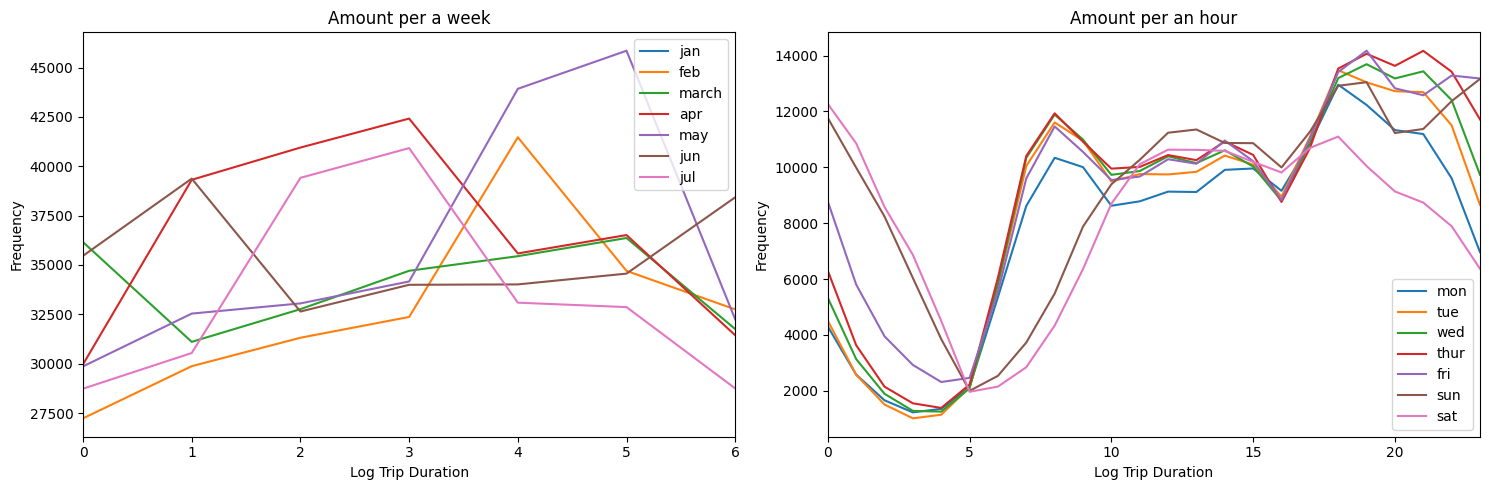

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title("Amount per a week")
# plt.hist(train_df["pickup_datetime"].dt.dayofweek, bins=7, color="pink", edgecolor="black")
plt.xlabel("Log Trip Duration")
plt.ylabel("Frequency")
plt.xlim(0, 6)
plt.tight_layout()
for mon in range(12):
    plt.plot(train_df[train_df["pickup_datetime"].dt.month==mon]["pickup_datetime"].dt.dayofweek.value_counts().sort_index())
plt.legend(['jan','feb','march','apr','may', 'jun','jul'])


plt.subplot(1,2,2)
plt.title("Amount per an hour")
# plt.hist(train_df["pickup_datetime"].dt.hour, bins=24, color="pink", edgecolor="black")
plt.xlabel("Log Trip Duration")
plt.ylabel("Frequency")
plt.xlim(0, 23)
plt.tight_layout()
for day in range(7):
    plt.plot(train_df[train_df["pickup_datetime"].dt.dayofweek==day]["pickup_datetime"].dt.hour.value_counts().sort_index())
plt.legend(['mon','tue','wed','thur','fri', 'sun','sat'])


plt.tight_layout()
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [18]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [19]:
sns.set_theme()

In [20]:
X_train, X_test = train_test_split(train_df, test_size=0.3, train_size=0.7, random_state=42)

In [21]:
train_test_split(train_df, test_size=0.3, train_size=0.7, random_state=42)

[                id  vendor_id     pickup_datetime  passenger_count  \
 1011257  id2209155          2 2016-05-03 09:03:08                2   
 178550   id0586605          1 2016-01-01 16:40:51                1   
 551460   id0467144          1 2016-04-24 13:57:03                1   
 1434271  id0989010          2 2016-01-10 17:03:47                1   
 1173610  id0580742          1 2016-02-25 17:37:36                1   
 ...            ...        ...                 ...              ...   
 259178   id1753868          2 2016-03-25 07:11:49                2   
 1414414  id2204747          1 2016-02-16 18:01:45                1   
 131932   id3043606          2 2016-01-26 19:22:29                1   
 671155   id1458584          1 2016-01-19 11:53:47                1   
 121958   id0357025          2 2016-02-10 22:39:31                1   
 
          pickup_longitude  pickup_latitude  dropoff_longitude  \
 1011257        -73.979813        40.752529         -73.982681   
 178550       

In [22]:
X_train["pickup_dayofweek"]=X_train["pickup_datetime"].dt.dayofweek
X_test["pickup_dayofweek"]=X_test["pickup_datetime"].dt.dayofweek
res_dayofweek = X_train.groupby("pickup_dayofweek")["log_trip_duration"].mean()

In [23]:
X_train["pickup_hour"]=X_train["pickup_datetime"].dt.hour
X_test["pickup_hour"]=X_test["pickup_datetime"].dt.hour
res_hourofday = X_train.groupby("pickup_hour")["log_trip_duration"].mean()

In [24]:
X_train["pickup_dayofyear"]=X_train["pickup_datetime"].dt.dayofyear
X_test["pickup_dayofyear"]=X_test["pickup_datetime"].dt.dayofyear
res_dayofyear = X_train.groupby("pickup_dayofyear")["log_trip_duration"].mean()

<Axes: xlabel='pickup_dayofyear', ylabel='log_trip_duration'>

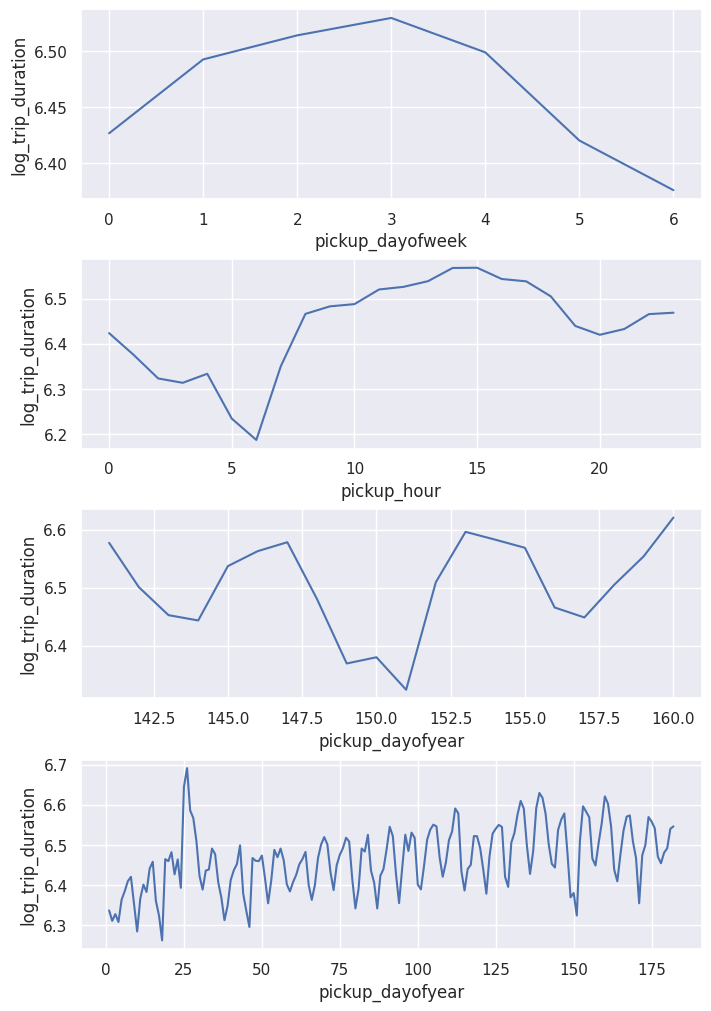

In [25]:
fig, axes = plt.subplots(4, 1, figsize=(7, 10), constrained_layout=True)

sns.lineplot(ax=axes[0], x=res_dayofweek.index, y=res_dayofweek)
sns.lineplot(ax=axes[1], x=res_hourofday.index, y=res_hourofday)
the3rd = sns.lineplot(ax=axes[2], x=res_dayofyear.index[140:160], y=res_dayofyear[140:160])
sns.lineplot(ax=axes[3], x=res_dayofyear.index, y=res_dayofyear)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [26]:
# 1st already done
# 2nd
X_train["pickup_month"]=X_train["pickup_datetime"].dt.month
X_test["pickup_month"]=X_test["pickup_datetime"].dt.month
# 3rd already done
# 4th
X_train['1st_anomaly'] = (X_train['pickup_datetime'].dt.date == datetime.date(2016, 1, 26))
X_train['2nd_anomaly'] = (X_train['pickup_datetime'].dt.dayofyear == 151)

X_test['1st_anomaly'] = (X_test['pickup_datetime'].dt.date == datetime.date(2016, 1, 26))
X_test['2nd_anomaly'] = (X_test['pickup_datetime'].dt.dayofyear == 151)

# 5th already done

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [27]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer

In [28]:
simple_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()

In [29]:
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

In [30]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
pipe_cat = Pipeline([('encoder', ohe_encoder)])

In [31]:
col_transformer = ColumnTransformer([('num_preproc', pipe_num, ['pickup_dayofyear']),('cat_preproc', pipe_cat, ['pickup_dayofweek', 'pickup_hour', 'pickup_month', '1st_anomaly', '2nd_anomaly'])])

In [32]:
res = col_transformer.fit_transform(X_train)
res

array([[ 0.62391343,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.76116223,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.4493957 ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.27639075,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.41212676,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.98552787,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
res.shape

(1021050, 42)

In [34]:
X_train.shape

(1021050, 17)

In [35]:
res_df = pd.DataFrame(res, columns = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()])
res_df.describe()
res_df

,pickup_dayofyear,pickup_dayofweek_0,pickup_dayofweek_1,pickup_dayofweek_2,pickup_dayofweek_3,pickup_dayofweek_4,pickup_dayofweek_5,pickup_dayofweek_6,pickup_hour_0,pickup_hour_1,...,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,1st_anomaly_False,1st_anomaly_True,2nd_anomaly_False,2nd_anomaly_True
0,0.623913,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.761162,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.449396,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.586644,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.694665,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021045,-0.132330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1021046,-0.869183,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1021047,-1.276391,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1021048,-1.412127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [36]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
your_lat_values = X_train['pickup_latitude'].iloc[:1000].values
your_lon_values = X_train['pickup_longitude'].iloc[:1000].values

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [38]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# cols=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
# for _ in cols:
#     X_train[_]=radians(X_train[_].all())

# X_train

In [39]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of the Earth (in kilometers)
    R = 6371.0

    # Calculate the distance
    distance = R * c

    return distance

In [40]:
import math
X_train['haversine'] = X_train.apply(
    lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                          row['dropoff_latitude'], row['dropoff_longitude']),
    axis=1
)

X_test['haversine'] = X_train.apply(
    lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                          row['dropoff_latitude'], row['dropoff_longitude']),
    axis=1
)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [41]:
X_train['haversine']+=1e-6
X_train['log_haversine']=X_train.apply(lambda row: math.log(row['haversine']), axis=1)
X_test['log_haversine']=X_train.apply(lambda row: math.log(row['haversine']), axis=1)

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

#### without log correlation

In [42]:
X_train['trip_duration'].corr(X_train['haversine'])

0.08373776682628939

In [43]:
X_train['log_trip_duration'].corr(X_train['haversine'])

0.5654059873890238

#### with log correlation

In [44]:
X_train['log_trip_duration'].corr(X_train['log_haversine'])

0.6156102218041039

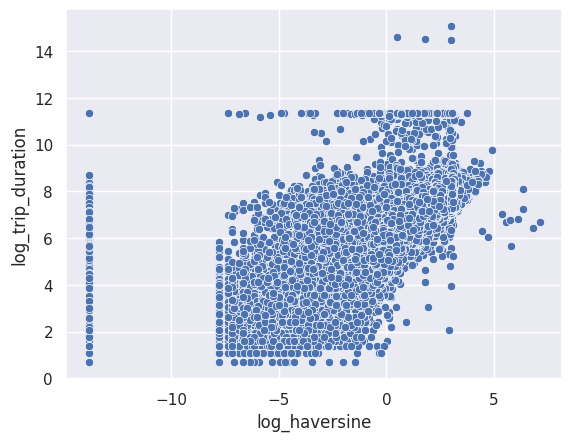

In [45]:
sns.scatterplot(x=X_train['log_haversine'], y=X_train['log_trip_duration'])
# plt.ylim(top=600+1e6)
# plt.xlim(right=0.0061+1.381e1)

plt.show()

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [46]:
X_train['average_speed']=X_train.apply(lambda row: row['haversine']/row['trip_duration'], axis=1)

In [47]:
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_dayofweek,pickup_hour,pickup_dayofyear,pickup_month,1st_anomaly,2nd_anomaly,haversine,log_haversine,average_speed
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,6.739337,1,9,124,5,False,False,1.263188,0.233639,0.001497
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,6.909753,4,16,1,1,False,False,4.804013,1.569452,0.004799
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,6.955593,6,13,115,4,False,False,7.471089,2.011041,0.007129
1434271,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,6.665684,6,17,10,1,False,False,3.444870,1.236886,0.004394
1173610,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,6.597146,3,17,56,2,False,False,2.481064,0.908687,0.003389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,7.156177,4,7,85,3,False,False,5.310384,1.669664,0.004145
1414414,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,6.726233,1,18,47,2,False,False,1.783778,0.578734,0.002141
131932,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,7.159292,1,19,26,1,True,False,7.407647,2.002513,0.005765
671155,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,389,5.966147,1,11,19,1,False,False,0.642216,-0.442830,0.001651


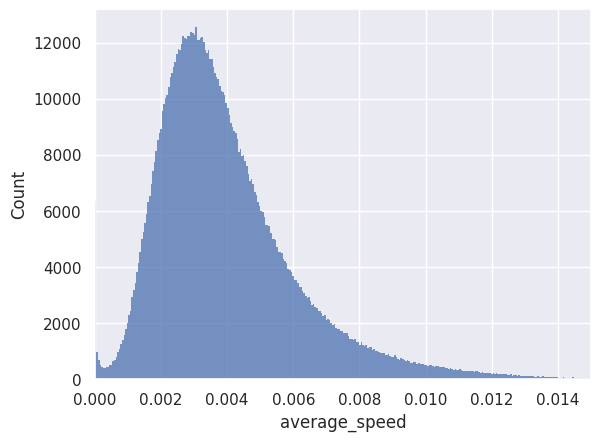

In [48]:
sns.histplot(X_train['average_speed'])
plt.xlim(left=0, right=0.015)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [49]:
quantile_70 = X_train['average_speed'].quantile(0.95)*3600
quantile_70

29.457979968343338

<Axes: xlabel='average_speed', ylabel='Count'>

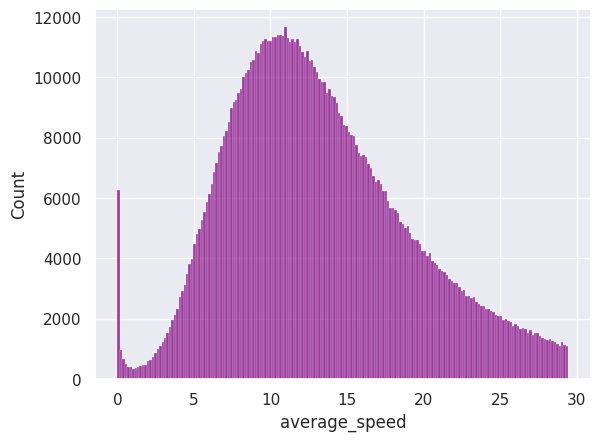

In [50]:
sns.histplot(X_train[X_train['average_speed']*3600<=quantile_70]['average_speed'] * 3600, color='purple')
# plt.xlim(left=0, right=0.015)7
# plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [51]:
X_train['week_number']=X_train['pickup_datetime'].dt.dayofweek
X_test['week_number']=X_test['pickup_datetime'].dt.dayofweek
X_train['hour']=X_train['pickup_datetime'].dt.hour
medians_arr = X_train.groupby(['week_number','hour'])['average_speed'].median()*3600
medians_arr = medians_arr.to_numpy().reshape(7, 24)

<Axes: >

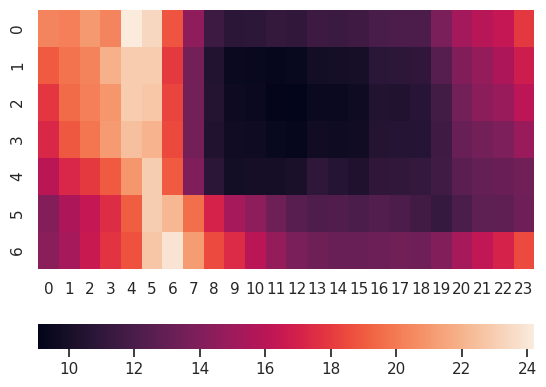

In [52]:
sns.heatmap(medians_arr, cbar_kws={"orientation": "horizontal"})

<Axes: >

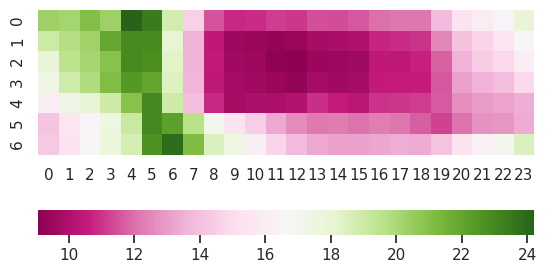

In [53]:
sns.heatmap(medians_arr, square=True, color='pink', cmap='PiYG', cbar_kws={"orientation": "horizontal"})

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [54]:
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_hour,pickup_dayofyear,pickup_month,1st_anomaly,2nd_anomaly,haversine,log_haversine,average_speed,week_number,hour
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,...,9,124,5,False,False,1.263188,0.233639,0.001497,1,9
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,...,16,1,1,False,False,4.804013,1.569452,0.004799,4,16
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,...,13,115,4,False,False,7.471089,2.011041,0.007129,6,13
1434271,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,...,17,10,1,False,False,3.444870,1.236886,0.004394,6,17
1173610,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,...,17,56,2,False,False,2.481064,0.908687,0.003389,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,...,7,85,3,False,False,5.310384,1.669664,0.004145,4,7
1414414,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,...,18,47,2,False,False,1.783778,0.578734,0.002141,1,18
131932,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,...,19,26,1,True,False,7.407647,2.002513,0.005765,1,19
671155,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,389,...,11,19,1,False,False,0.642216,-0.442830,0.001651,1,11


In [55]:
X_train.drop('average_speed', axis=1, inplace=True)
pass

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [56]:
X_train['is_traffic_jam']=0
X_train['is_empty_roads']=0
X_train.loc[(X_train['pickup_hour'].between(8, 18)) & (X_train['week_number'].between(0, 3)), 'is_traffic_jam']=1
X_train.loc[(X_train['pickup_hour'].between(0, 6)) & (X_train['week_number'].between(0, 4)), 'is_empty_roads']=1

X_test['is_traffic_jam']=0
X_test['is_empty_roads']=0
X_test.loc[(X_train['pickup_hour'].between(8, 18)) & (X_test['week_number'].between(0, 3)), 'is_traffic_jam']=1
X_test.loc[(X_train['pickup_hour'].between(0, 6)) & (X_test['week_number'].between(0, 4)), 'is_empty_roads']=1
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_dayofyear,pickup_month,1st_anomaly,2nd_anomaly,haversine,log_haversine,week_number,hour,is_traffic_jam,is_empty_roads
1011257,id2209155,2,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,N,844,...,124,5,False,False,1.263188,0.233639,1,9,1,0
178550,id0586605,1,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,N,1001,...,1,1,False,False,4.804013,1.569452,4,16,0,0
551460,id0467144,1,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,N,1048,...,115,4,False,False,7.471089,2.011041,6,13,0,0
1434271,id0989010,2,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,N,784,...,10,1,False,False,3.444870,1.236886,6,17,0,0
1173610,id0580742,1,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,N,732,...,56,2,False,False,2.481064,0.908687,3,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,...,85,3,False,False,5.310384,1.669664,4,7,0,0
1414414,id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,...,47,2,False,False,1.783778,0.578734,1,18,1,0
131932,id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,...,26,1,True,False,7.407647,2.002513,1,19,0,0
671155,id1458584,1,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,N,389,...,19,1,False,False,0.642216,-0.442830,1,11,1,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [57]:
X_train['start_in1st']=0
X_train['drop_in1st']=0
X_train['start_in2nd']=0
X_train['drop_in2nd']=0

X_test['start_in1st']=0
X_test['drop_in1st']=0
X_test['start_in2nd']=0
X_test['drop_in2nd']=0

In [58]:
X_train.loc[X_train['pickup_longitude']==X_train['pickup_longitude'].max(), 'start_in1st']=1
X_train.loc[X_train['dropoff_longitude']==X_train['dropoff_longitude'].max(), 'drop_in1st']=1
X_train.loc[X_train['pickup_longitude']==X_train['pickup_longitude'].min(), 'start_in2nd']=1
X_train.loc[X_train['dropoff_longitude']==X_train['dropoff_longitude'].min(), 'drop_in2nd']=1

X_test.loc[X_test['pickup_longitude']==X_test['pickup_longitude'].max(), 'start_in1st']=1
X_test.loc[X_test['dropoff_longitude']==X_test['dropoff_longitude'].max(), 'drop_in1st']=1
X_test.loc[X_test['pickup_longitude']==X_test['pickup_longitude'].min(), 'start_in2nd']=1
X_test.loc[X_test['dropoff_longitude']==X_test['dropoff_longitude'].min(), 'drop_in2nd']=1

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

/tmp/ipykernel_85061/1238843950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train.loc[X_train['is_traffic_jam']==1]['log_trip_duration'], palette='viridis', legend=True)
/tmp/ipykernel_85061/1238843950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train.loc[X_train['is_empty_roads']==1]['log_trip_duration'], palette='viridis', legend=True)


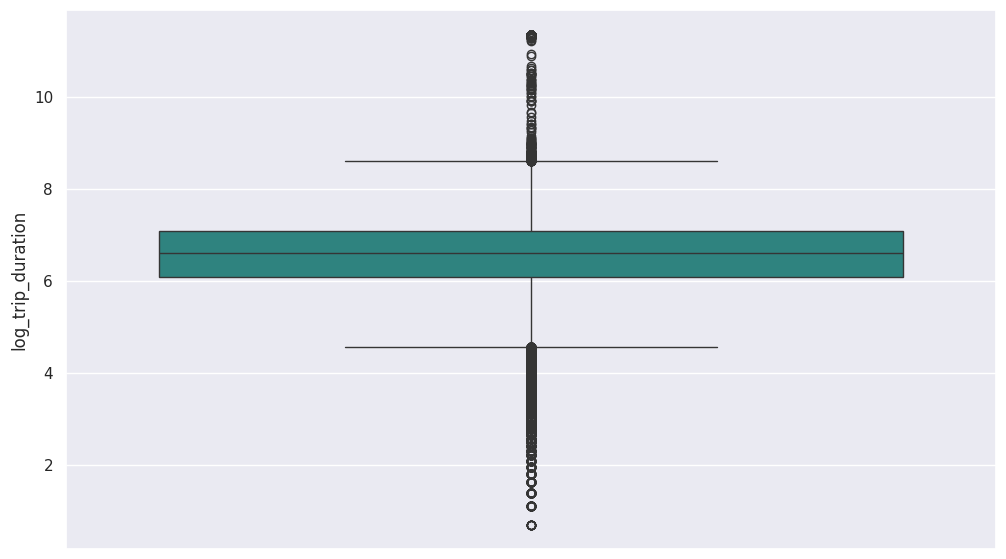

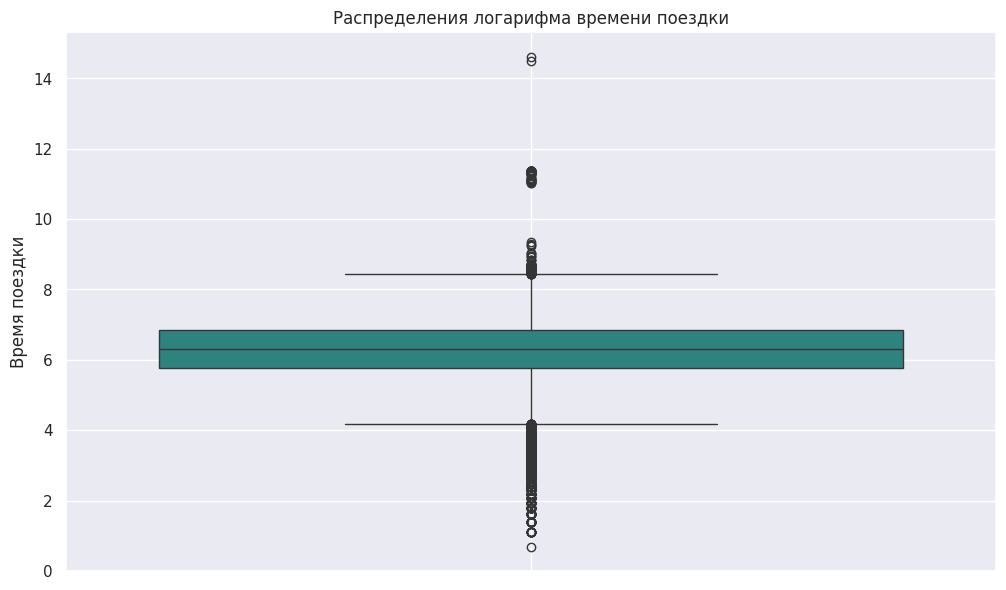

In [59]:
plt.figure(figsize=(12, 7)) 
sns.boxplot(data=X_train.loc[X_train['is_traffic_jam']==1]['log_trip_duration'], palette='viridis', legend=True) 
plt.figure(figsize=(12, 7)) 
sns.boxplot(data=X_train.loc[X_train['is_empty_roads']==1]['log_trip_duration'], palette='viridis', legend=True) 
plt.title("Распределения логарифма времени поездки")
plt.ylabel("Время поездки")
plt.grid(True)
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import numpy as np


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, x_bins=3, y_bins=4, clip_quantiles=(0.01, 0.99)):
        self.x_bins=x_bins
        self.y_bins=y_bins
        self.clip_quantiles=clip_quantiles
        pass

    def show_map(self, X=None, sample_size=10000, alpha=0.3):
        """
        Рисует сетку с номерами ячеек и, при желании, отображает поездки.
        X — DataFrame с координатами (pickup/dropoff), если задан — покажем точки
        sample_size — сколько случайных поездок отобразить (если X задан)
        alpha — прозрачность точек
        """
        # Сетка: границы по x и y
        x_edges = np.linspace(self.x_min, self.x_max, self.x_bins + 1)
        y_edges = np.linspace(self.y_min, self.y_max, self.y_bins + 1)
    
        fig, ax = plt.subplots(figsize=(8, 10))
    
        # Рисуем линии сетки
        for x in x_edges:
            ax.plot([x, x], [self.y_min, self.y_max], color='gray', lw=1, linestyle='--')
        for y in y_edges:
            ax.plot([self.x_min, self.x_max], [y, y], color='gray', lw=1, linestyle='--')
    
        # Подписываем номера ячеек
        for i in range(self.x_bins):
            for j in range(self.y_bins):
                cell_id = j * self.x_bins + i
                x_center = (x_edges[i] + x_edges[i + 1]) / 2
                y_center = (y_edges[j] + y_edges[j + 1]) / 2
                ax.text(x_center, y_center, str(cell_id), ha='center', va='center', fontsize=8, color='blue')
    
        # Если заданы данные — показываем поездки
        if X is not None:
            if len(X) > sample_size:
                X = X.sample(sample_size)
    
            ax.scatter(X['pickup_longitude'], X['pickup_latitude'], c='green', label='pickup', alpha=alpha, s=10)
            ax.scatter(X['dropoff_longitude'], X['dropoff_latitude'], c='red', label='dropoff', alpha=alpha, s=10)
    
            ax.legend()
    
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title('Grid Map with Cell IDs')
        plt.grid(False)
        plt.show()

    def fit(self, X=None, y=None):
        if self.clip_quantiles is not None:
            q_low, q_high = self.clip_quantiles
            self.x_min = np.quantile(np.hstack([X['pickup_longitude'], X['dropoff_longitude']]), q_low)
            self.x_max = np.quantile(np.hstack([X['pickup_longitude'], X['dropoff_longitude']]), q_high)
            self.y_min = np.quantile(np.hstack([X['pickup_latitude'], X['dropoff_latitude']]), q_low)
            self.y_max = np.quantile(np.hstack([X['pickup_latitude'], X['dropoff_latitude']]), q_high)
        else:
            self.x_min = min(X['pickup_longitude'].min(), X['dropoff_longitude'].min())
            self.x_max = max(X['pickup_longitude'].max(), X['dropoff_longitude'].max())
            self.y_min = min(X['pickup_latitude'].min(), X['dropoff_latitude'].min())
            self.y_max = max(X['pickup_latitude'].max(), X['dropoff_latitude'].max())
        return self

    def _coords_to_cell(self, lon, lat):
        x_idx = ((lon - self.x_min) / (self.x_max - self.x_min) * self.x_bins).astype(int)
        y_idx = ((lat - self.y_min) / (self.y_max - self.y_min) * self.y_bins).astype(int)

        mask = (x_idx >= 0) & (x_idx < self.x_bins) & (y_idx >= 0) & (y_idx < self.y_bins)
        cell_ids = np.where(mask, y_idx * self.x_bins + x_idx, -1)

        return cell_ids

    def transform(self, X, y=None):
        start_cell = self._coords_to_cell(X['pickup_longitude'], X['pickup_latitude'])
        end_cell = self._coords_to_cell(X['dropoff_longitude'], X['dropoff_latitude'])   

        return np.c_[start_cell, end_cell]

### grid check

[[6 6]
 [6 9]
 [9 7]
 ...
 [6 9]
 [6 6]
 [7 6]]


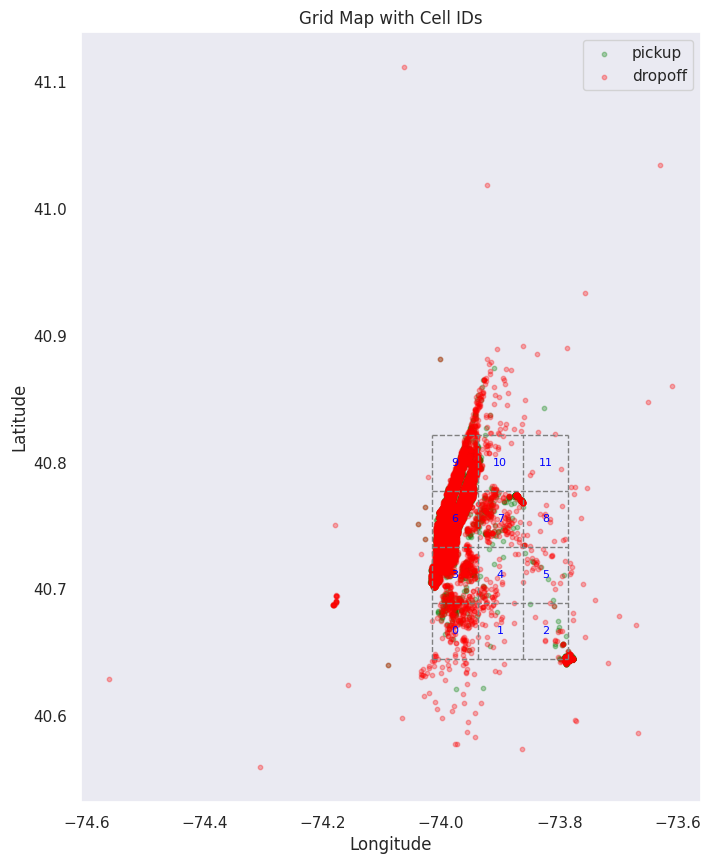

In [61]:
grid = MapGridTransformer()
grid.fit(X_train)
grid_transformed = grid.transform(X_train)
print(grid.transform(X_train))
grid.show_map(X_train)

#for test cells features values
grid_transformed_test = grid.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [62]:
X_train.drop('haversine', axis=1, inplace=True, errors='ignore')
X_test.drop('haversine', axis=1, inplace=True,  errors='ignore')

In [63]:
X_train['start_cell'], X_train['end_cell'] = grid_transformed.transpose()[0], grid_transformed.transpose()[1]
X_test['start_cell'], X_test['end_cell'] = grid_transformed_test.transpose()[0], grid_transformed_test.transpose()[1]

In [64]:
y_trip_duration = pd.concat([X_train['trip_duration'], X_test['trip_duration']])
X_train.drop('trip_duration', axis=1, inplace=True, errors='ignore')
X_test.drop('trip_duration', axis=1, inplace=True, errors='ignore')

In [65]:
y_train = X_train['log_trip_duration'].loc[X_train.index]
y_test = X_test['log_trip_duration'].loc[X_test.index]

X_train.drop('log_trip_duration', axis=1, inplace=True, errors='ignore')
X_test.drop('log_trip_duration', axis=1, inplace=True, errors='ignore')

In [66]:
# print(X_train.describe())
# print(X_train.head(5))

X_test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pickup_dayofweek',
       'pickup_hour', 'pickup_dayofyear', 'pickup_month', '1st_anomaly',
       '2nd_anomaly', 'log_haversine', 'week_number', 'is_traffic_jam',
       'is_empty_roads', 'start_in1st', 'drop_in1st', 'start_in2nd',
       'drop_in2nd', 'start_cell', 'end_cell'],
      dtype='object')

In [67]:
cat_features = ['start_cell', 'end_cell', 'pickup_dayofweek', 'pickup_hour', '1st_anomaly',
       '2nd_anomaly', 'is_traffic_jam', 'is_empty_roads', 'start_in1st', 'drop_in1st', 'start_in2nd',
       'drop_in2nd']
num_features = ['log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_dayofyear', 'week_number', 'pickup_month',]

numeric_preprocessor = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("imputer", SimpleImputer(strategy="mean")), 
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore",  sparse_output=False)),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_features),
        ("numerical", numeric_preprocessor, num_features),
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

ridge = Ridge(alpha=1.0)  
ridge.fit(X_train_transformed, y_train)

y_pred = ridge.predict(X_test_transformed)
print('prediction', y_pred)
print('test', y_test)

prediction [6.38886847 6.36573756 6.23419441 ... 6.50109489 6.2764373  6.3073766 ]
test 67250      6.947937
1397036    6.719013
1021087    6.421622
951424     6.766192
707882     8.510773
             ...   
876090     6.717805
832420     6.163315
771092     6.171701
1032031    7.038784
726290     6.968850
Name: log_trip_duration, Length: 437594, dtype: float64


In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
mean_squared_error(y_test, y_pred)

0.5621853083547801

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

## unique values

In [70]:
print(X_train['vendor_id'].unique())
print(X_train['passenger_count'].unique())
print(X_train['store_and_fwd_flag'].unique())

[2 1]
[2 1 5 3 6 4 0 7 8 9]
['N' 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

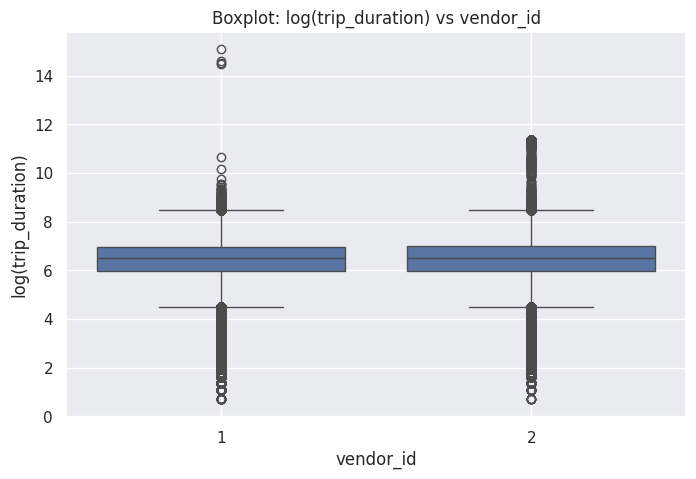

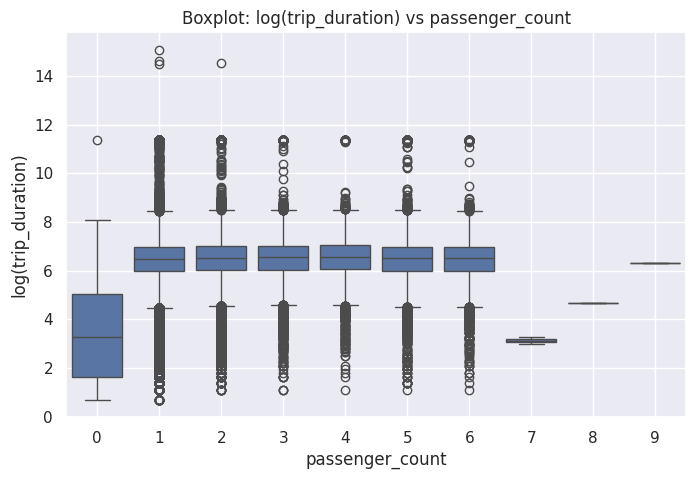

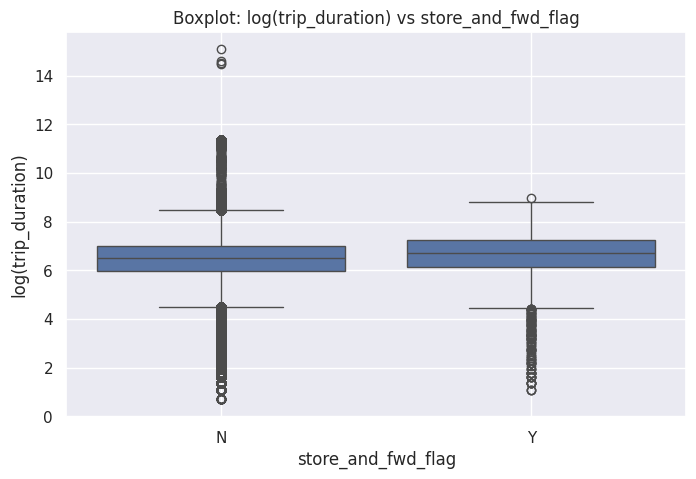

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Признаки, которые нужно изучить
features = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

# Строим boxplot для каждого признака
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.title(f'Boxplot: log(trip_duration) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('log(trip_duration)')
    plt.grid(True)
    plt.show()


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [72]:
X_train['vendor_id'] = X_train['vendor_id'].map({1: 0, 2: 1})
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
X_test['vendor_id'] = X_test['vendor_id'].map({1: 0, 2: 1})
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [73]:
cat_features_extended = cat_features + ['vendor_id', 'store_and_fwd_flag']
num_features_extended = num_features + ['passenger_count']

numeric_preprocessor = Pipeline([
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="mean")),
])

categorical_preprocessor = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocessor = ColumnTransformer([
    ("categorical", categorical_preprocessor, cat_features_extended),
    ("numerical", numeric_preprocessor, num_features_extended),
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_transformed, y_train)

y_pred = ridge.predict(X_test_transformed)

print(mean_squared_error(y_test, y_pred))


0.5618091792128709


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [74]:
y_train.describe()

count    1.021050e+06
mean     6.467067e+00
std      7.960733e-01
min      6.931472e-01
25%      5.986452e+00
50%      6.498282e+00
75%      6.981006e+00
max      1.507575e+01
Name: log_trip_duration, dtype: float64

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [75]:
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dayofweek,...,week_number,hour,is_traffic_jam,is_empty_roads,start_in1st,drop_in1st,start_in2nd,drop_in2nd,start_cell,end_cell
1011257,id2209155,1,2016-05-03 09:03:08,2,-73.979813,40.752529,-73.982681,40.763680,0,1,...,1,9,1,0,0,0,0,0,6,6
178550,id0586605,0,2016-01-01 16:40:51,1,-73.977623,40.746296,-73.968414,40.788933,0,4,...,4,16,0,0,0,0,0,0,6,9
551460,id0467144,0,2016-04-24 13:57:03,1,-73.950699,40.779404,-73.863129,40.768608,0,6,...,6,13,0,0,0,0,0,0,9,7
1434271,id0989010,1,2016-01-10 17:03:47,1,-73.984558,40.721802,-73.976753,40.752213,0,6,...,6,17,0,0,0,0,0,0,3,6
1173610,id0580742,0,2016-02-25 17:37:36,1,-73.967720,40.768742,-73.977173,40.789875,0,3,...,3,17,1,0,0,0,0,0,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,id1753868,1,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,0,4,...,4,7,0,0,0,0,0,0,9,6
1414414,id2204747,0,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,0,1,...,1,18,1,0,0,0,0,0,6,6
131932,id3043606,1,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,0,1,...,1,19,0,0,0,0,0,0,6,9
671155,id1458584,0,2016-01-19 11:53:47,1,-73.962341,40.767323,-73.969757,40.768669,0,1,...,1,11,1,0,0,0,0,0,6,6


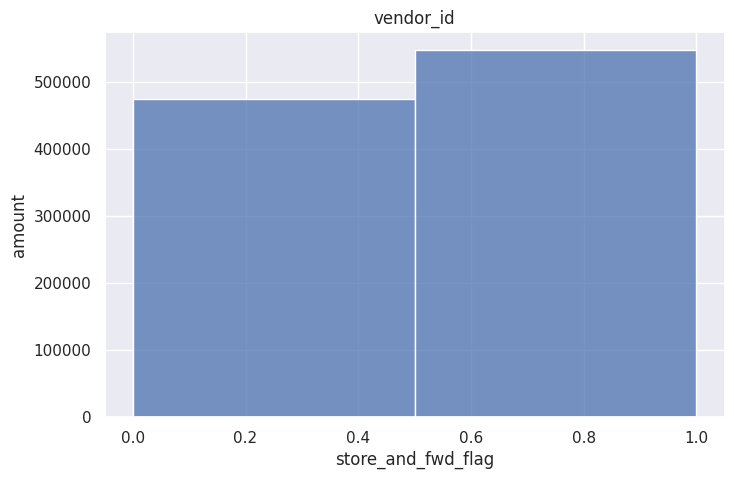

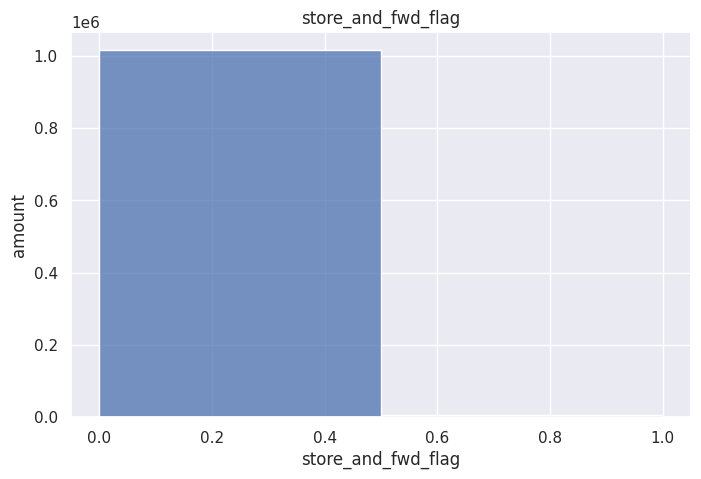

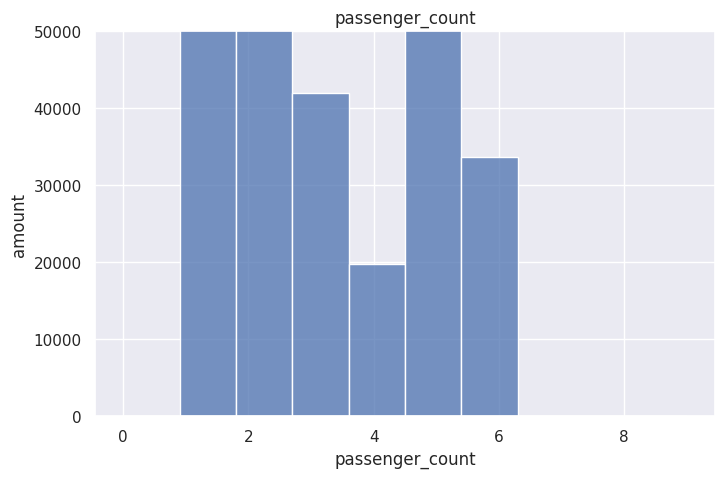

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(x=X_train['vendor_id'], bins=len(X_train['vendor_id'].unique()))
plt.title('vendor_id')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(x=X_train['store_and_fwd_flag'], bins=len(X_train['store_and_fwd_flag'].unique()))
plt.title('store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(x=X_train['passenger_count'], bins=len(X_train['passenger_count'].unique()))
plt.title('passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('amount')
plt.ylim(top=50000)
plt.grid(True)
plt.show()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [77]:
# cat_features = ['start_cell', 'end_cell', 'pickup_dayofweek', 'pickup_hour', 'is_traffic_jam', 'is_empty_roads', 'vendor_id']
# num_features = ['log_haversine', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_dayofyear', 'week_number', 'pickup_month', 'passenger_count']

cat_features = ['is_traffic_jam', 'is_empty_roads', 'vendor_id']
num_features = ['start_cell', 'end_cell', 'log_haversine', 'pickup_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_dayofweek', 'pickup_hour', 'week_number']

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [78]:
num_features_for_corr = ['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude']
corr = X_train[num_features_for_corr].corr()
print(corr)

                   pickup_longitude  dropoff_longitude  dropoff_latitude  \
pickup_longitude           1.000000           0.736855          0.073100   
dropoff_longitude          0.736855           1.000000          0.095538   
dropoff_latitude           0.073100           0.095538          1.000000   
pickup_latitude           -0.014780           0.087085          0.483465   

                   pickup_latitude  
pickup_longitude         -0.014780  
dropoff_longitude         0.087085  
dropoff_latitude          0.483465  
pickup_latitude           1.000000  


In [79]:
from sklearn.metrics import r2_score, mean_squared_log_error

numeric_preprocessor = Pipeline([
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="mean")),
])

categorical_preprocessor = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocessor = ColumnTransformer([
    ("categorical", categorical_preprocessor, cat_features),
    ("numerical", numeric_preprocessor, num_features),
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

ridge = Ridge(alpha=339)
ridge.fit(X_train_transformed, y_train)

y_pred = ridge.predict(X_test_transformed)

print(mean_squared_error(y_test, y_pred))
print("Model score (R^2):", r2_score(y_test, y_pred))
print("RMSLE: ",  np.sqrt(mean_squared_log_error(y_test, abs(y_pred))))

0.6066948866160788
Model score (R^2): 0.040142668228822065
RMSLE:  0.1106059543865535


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [80]:
type(X_train)

pandas.core.frame.DataFrame

In [81]:
print(len(cat_features)+len(num_features))
print(len(pd.DataFrame(X_train_transformed).columns))

12
15


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

### lasso check

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_transformed, y_train)

y_pred_lasso = lasso.predict(X_test_transformed)

print(mean_squared_error(y_test, y_pred_lasso))
print("Model score (R^2):", r2_score(y_test, y_pred_lasso))
print("RMSLE: ",  np.sqrt(mean_squared_log_error(y_test, abs(y_pred_lasso))))

0.6066900416606917
Model score (R^2): 0.04015033347547725
RMSLE:  0.11060640222764662


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [83]:
from sklearn.model_selection import GridSearchCV

X_train_inner, X_val_inner, y_train_inner, y_val_inner = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=42)

alphas = np.logspace(-6, 4, 75)

X_train_inner_transformed = preprocessor.fit_transform(X_train_inner)
X_val_inner_transformed = preprocessor.transform(X_val_inner)

# Для Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid={'alpha': alphas}, scoring='r2', cv=5)
ridge_grid.fit(X_val_inner_transformed, y_val_inner)
print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])
print("Best R^2 (Ridge):", ridge_grid.best_score_)

# Для Lasso
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid={'alpha': alphas}, scoring='r2', cv=5)
lasso_grid.fit(X_val_inner_transformed, y_val_inner)
print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])
print("Best R^2 (Lasso):", lasso_grid.best_score_)

Best alpha for Ridge: 326.2222009711673
Best R^2 (Ridge): 0.4329033331284421
Best alpha for Lasso: 0.00014526539259467812
Best R^2 (Lasso): 0.4329014381114966


Сохраните наилучшее значение, как бенчмарк на будущее

In [84]:
#got it with Best alpha for Ridge: 326.2222009711673
best_rmsle =  0.4329033331284421 #its r^2 lmaooooooooooooooooo

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [85]:
lasso = Lasso(max_iter=10000, alpha=0.000145)
lasso.fit(X_train_inner_transformed, y_train_inner)
ridge = Ridge(max_iter=10000, alpha=326.22)
ridge.fit(X_train_inner_transformed, y_train_inner)

Ridge(alpha=326.22, max_iter=10000)

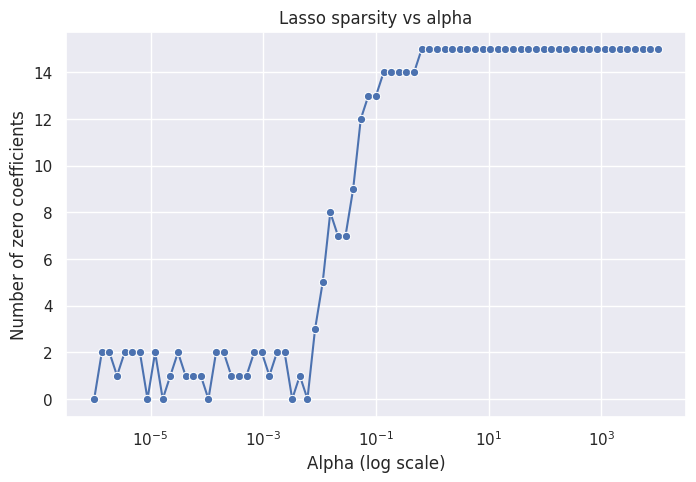

In [86]:
lasso_coefs = []

for alpha_i in alphas:
    lasso_temp=Lasso(max_iter=10000, alpha=alpha_i)
    lasso_temp.fit(X_train_inner_transformed, y_train_inner)
    lasso_coefs.append(lasso_temp.coef_)

n_zeros = [np.sum(coefs == 0) for coefs in lasso_coefs]

plt.figure(figsize=(8, 5))
sns.lineplot(x=alphas, y=n_zeros, marker="o")
plt.xscale("log") 
plt.xlabel("Alpha (log scale)")
plt.ylabel("Number of zero coefficients")
plt.title("Lasso sparsity vs alpha")
plt.grid(True)
plt.show()

###  Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [87]:
lasso_half_zeros = Lasso(max_iter=10000, alpha=alphas[n_zeros.index(8)])
lasso_half_zeros.fit(X_train_inner_transformed, y_train_inner)
lasso_half_zeros_predict = lasso_half_zeros.predict(X_test_transformed)
print("with half of weights equal zeros: ", np.sqrt(r2_score(y_test, lasso_half_zeros_predict)))
print(best_rmsle)

with half of weights equal zeros:  0.19475902197559855
0.4329033331284421


In [88]:
print(lasso.predict(X_test_transformed))

[6.34628331 6.4188097  6.4066958  ... 6.56729986 6.48034783 6.2528941 ]


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [89]:
from IPython.display import display

In [106]:
cell_data = X_train_inner.groupby(['start_cell', 'end_cell'])['id'].count()
top_100_cell_data = cell_data.sort_values(ascending=False)[:100]
top_100_cell_data_indexes = top_100_cell_data.index
top_100_df = top_100_cell_data_indexes.to_frame(index=False)
top_100_df['id'] = top_100_df.index

In [107]:
def polynomial_cell_feature(row):
    X_train_inner.loc[(X_train_inner['start_cell']==row[0]) & (X_train_inner['end_cell']==row[1]), 'cells_pair']=row['id']
    X_val_inner.loc[(X_val_inner['start_cell']==row[0]) & (X_val_inner['end_cell']==row[1]), 'cells_pair']=row['id']
    X_test.loc[(X_test['start_cell']==row[0]) & (X_test['end_cell']==row[1]), 'cells_pair']=row['id']

In [108]:
X_train_inner.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dayofweek,...,hour,is_traffic_jam,is_empty_roads,start_in1st,drop_in1st,start_in2nd,drop_in2nd,start_cell,end_cell,cells_pair
459337,id0505991,0,2016-02-24 17:14:31,1,-73.982147,40.762482,-73.985680,40.757504,0,2,...,17,1,0,0,0,0,0,6,6,0
2890,id0831347,0,2016-04-15 23:15:41,1,-73.988388,40.731518,-73.987007,40.761208,0,4,...,23,0,0,0,0,0,0,3,6,-1
1190604,id3192262,0,2016-05-31 10:32:31,1,-74.010300,40.709763,-74.004379,40.735359,0,1,...,10,1,0,0,0,0,0,3,6,-1
392899,id2697956,1,2016-03-21 18:44:53,1,-73.984993,40.760151,-73.972733,40.763580,0,0,...,18,1,0,0,0,0,0,6,6,0
868169,id2229253,0,2016-03-03 12:59:54,3,-73.968437,40.751740,-73.980530,40.763065,0,3,...,12,1,0,0,0,0,0,6,6,0


In [109]:
X_train_inner['cells_pair']=-1
X_val_inner['cells_pair']=-1
X_test['cells_pair']=-1
top_100_df.apply(polynomial_cell_feature, axis=1)

/tmp/ipykernel_85061/2080382873.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_train_inner.loc[(X_train_inner['start_cell']==row[0]) & (X_train_inner['end_cell']==row[1]), 'cells_pair']=row['id']
/tmp/ipykernel_85061/2080382873.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_val_inner.loc[(X_val_inner['start_cell']==row[0]) & (X_val_inner['end_cell']==row[1]), 'cells_pair']=row['id']
/tmp/ipykernel_85061/2080382873.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [113]:
display(X_train_inner.head())
display(X_val_inner.head())
display(X_test.head())

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dayofweek,...,hour,is_traffic_jam,is_empty_roads,start_in1st,drop_in1st,start_in2nd,drop_in2nd,start_cell,end_cell,cells_pair
459337,id0505991,0,2016-02-24 17:14:31,1,-73.982147,40.762482,-73.985680,40.757504,0,2,...,17,1,0,0,0,0,0,6,6,0
2890,id0831347,0,2016-04-15 23:15:41,1,-73.988388,40.731518,-73.987007,40.761208,0,4,...,23,0,0,0,0,0,0,3,6,2
1190604,id3192262,0,2016-05-31 10:32:31,1,-74.010300,40.709763,-74.004379,40.735359,0,1,...,10,1,0,0,0,0,0,3,6,2
392899,id2697956,1,2016-03-21 18:44:53,1,-73.984993,40.760151,-73.972733,40.763580,0,0,...,18,1,0,0,0,0,0,6,6,0
868169,id2229253,0,2016-03-03 12:59:54,3,-73.968437,40.751740,-73.980530,40.763065,0,3,...,12,1,0,0,0,0,0,6,6,0


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dayofweek,...,hour,is_traffic_jam,is_empty_roads,start_in1st,drop_in1st,start_in2nd,drop_in2nd,start_cell,end_cell,cells_pair
1427493,id0834774,1,2016-04-19 11:30:09,1,-73.989449,40.729885,-73.972351,40.753857,0,1,...,11,1,0,0,0,0,0,3,6,2
343765,id0488511,0,2016-04-27 14:15:34,1,-74.007538,40.725700,-74.002602,40.715111,0,2,...,14,1,0,0,0,0,0,3,3,4
676431,id1403223,1,2016-03-25 12:44:33,1,-73.998680,40.729759,-73.995453,40.721661,0,4,...,12,0,0,0,0,0,0,3,3,4
967342,id3470441,1,2016-02-03 20:26:28,1,-73.975822,40.760159,-73.975357,40.745720,0,2,...,20,0,0,0,0,0,0,6,6,0
1013976,id3090153,0,2016-04-16 09:16:22,1,-73.953323,40.782700,-73.948395,40.774136,0,5,...,9,0,0,0,0,0,0,9,6,5


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dayofweek,...,week_number,is_traffic_jam,is_empty_roads,start_in1st,drop_in1st,start_in2nd,drop_in2nd,start_cell,end_cell,cells_pair
67250,id2793718,1,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,0,2,...,2,0,0,0,0,0,0,6,6,0
1397036,id3485529,1,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,0,6,...,6,0,0,0,0,0,0,6,6,0
1021087,id1816614,1,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,0,6,...,6,0,0,0,0,0,0,6,6,0
951424,id1050851,1,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,0,3,...,3,0,0,0,0,0,0,3,6,2
707882,id0140657,0,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,0,3,...,3,0,0,0,0,0,0,2,6,19


In [114]:
X_train_inner['cells_pair'].describe()

count    816840.000000
mean          4.568465
std           9.558277
min          -1.000000
25%           0.000000
50%           1.000000
75%           5.000000
max          99.000000
Name: cells_pair, dtype: float64

In [115]:
num_features=[
 'log_haversine',
 'pickup_longitude',
 'dropoff_latitude',
 'passenger_count',
 'pickup_dayofweek',
 'pickup_hour',
 'week_number']

cat_features = ['is_traffic_jam', 'is_empty_roads', 'vendor_id', 'cells_pair']

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [117]:
numeric_preprocessor = Pipeline([
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="mean")),
])

categorical_preprocessor = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

preprocessor = ColumnTransformer([
    ("categorical", categorical_preprocessor, cat_features),
    ("numerical", numeric_preprocessor, num_features),
])


X_train_inner_transformed = preprocessor.fit_transform(X_train_inner)
X_val_inner_transformed = preprocessor.transform(X_val_inner)

# Для Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid={'alpha': alphas}, scoring='r2', cv=5)
ridge_grid.fit(X_val_inner_transformed, y_val_inner)
print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])
print("Best R^2 (Ridge):", ridge_grid.best_score_)
print(best_rmsle)

Best alpha for Ridge: 7.796360130405237
Best R^2 (Ridge): 0.4837290285872613
0.4329033331284421


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [96]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [97]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [98]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.